In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

In [2]:
g_df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_combined_net_metrics.csv')
r_df = pd.read_csv('/data/HSC/HSC_v6/step1/r_band_sextractor/shape_parameters_with_combined_net_metrics.csv')
i_df = pd.read_csv('/data/HSC/HSC_v6/step1/i_band_sextractor/shape_parameters_with_combined_net_metrics.csv')
z_df = pd.read_csv('/data/HSC/HSC_v6/step1/z_band_sextractor/shape_parameters_with_combined_net_metrics.csv')
y_df = pd.read_csv('/data/HSC/HSC_v6/step1/y_band_sextractor/shape_parameters_with_combined_net_metrics.csv')
df_list = [g_df, r_df, i_df, z_df, y_df]

In [3]:
bands = ['g', 'r', 'i', 'z', 'y']
metrics = ["bias", "outlier_rate", "loss", "rmse"]
metric_names = ['Bias', 'Outlier Rate', 'Loss', 'RMSE']
shape_params = ["SPHEROID_SERSICN", "ISOAREA_IMAGE", "FLUX_RADIUS", "MU_MAX", "ELLIPTICITY", "A_IMAGE", "B_IMAGE", "THETA_IMAGE", "PIXEL_AREA"]
shape_param_names = ['Sersic Index', 'Isophotal Area', 'Half-Light Radius', 'Max Surface Brightness', 'Ellipticity', 'Major Axis', 'Minor Axis', 'Position Angle', 'Pixel Area']

In [4]:
df = g_df # choose a band
pct50 = df[shape_params].describe().loc['50%']
pct50

SPHEROID_SERSICN      1.2210
ISOAREA_IMAGE       261.0000
FLUX_RADIUS           5.6890
MU_MAX               -4.5523
ELLIPTICITY           0.1890
A_IMAGE               3.9250
B_IMAGE               3.0370
THETA_IMAGE           0.2600
PIXEL_AREA          263.0000
Name: 50%, dtype: float64

In [5]:
for i, param in enumerate(shape_params):
    print(f'{len(df[(df[param] > pct50[param]) & (df["specz"] < 1)]) / len(df[df[param] > pct50[param]])*100}% of sources above the 50th percentile of {shape_param_names[i]} are at z < 1.')

92.32957194814884% of sources above the 50th percentile of Sersic Index are at z < 1.
93.9102863004756% of sources above the 50th percentile of Isophotal Area are at z < 1.
99.77165757957034% of sources above the 50th percentile of Half-Light Radius are at z < 1.
92.21342031686859% of sources above the 50th percentile of Max Surface Brightness are at z < 1.
95.60029828486203% of sources above the 50th percentile of Ellipticity are at z < 1.
99.64114275061752% of sources above the 50th percentile of Major Axis are at z < 1.
98.70456663560113% of sources above the 50th percentile of Minor Axis are at z < 1.
87.86932612545438% of sources above the 50th percentile of Position Angle are at z < 1.
93.95212095758086% of sources above the 50th percentile of Pixel Area are at z < 1.


In [6]:
for i, df in enumerate(df_list):
    print(f'{(len(df[df["NUMBER_IN_CENTER_10PX_DIAMETER"] > 1]) / len(df))}% of images in the {bands[i]} band were crowded with a 10px diameter in the g band.')
    print(f'{(len(df[df["NUMBER_IN_CENTER_20PX_DIAMETER"] > 1]) / len(df))}% of images in the {bands[i]} band were crowded with a 20px diameter in the g band.')
    print(f'{(len(df[df["NUMBER_IN_CENTER_30PX_DIAMETER"] > 1]) / len(df))}% of images in the {bands[i]} band were crowded with a 30px diameter in the g band.')

0.011416323012045386% of images in the g band were crowded with a 10px diameter in the g band.
0.027259383518557348% of images in the g band were crowded with a 20px diameter in the g band.
0.04314904126185317% of images in the g band were crowded with a 30px diameter in the g band.
0.01085614443797321% of images in the r band were crowded with a 10px diameter in the g band.
0.027489807804309842% of images in the r band were crowded with a 20px diameter in the g band.
0.045055329062317996% of images in the r band were crowded with a 30px diameter in the g band.
0.01438781924429027% of images in the i band were crowded with a 10px diameter in the g band.
0.03580657928433404% of images in the i band were crowded with a 20px diameter in the g band.
0.05778408958629199% of images in the i band were crowded with a 30px diameter in the g band.
0.010598648963428837% of images in the z band were crowded with a 10px diameter in the g band.
0.02629862566969485% of images in the z band were crowd

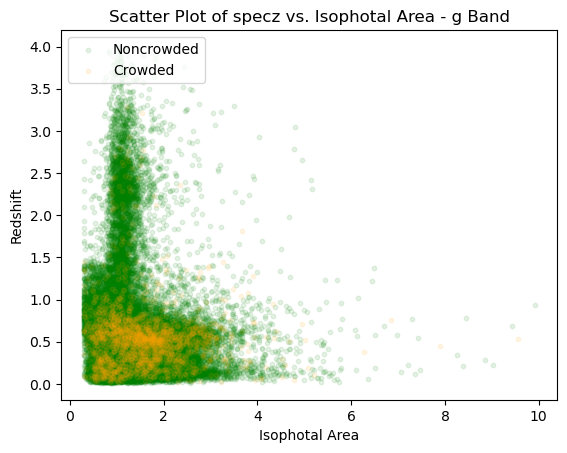

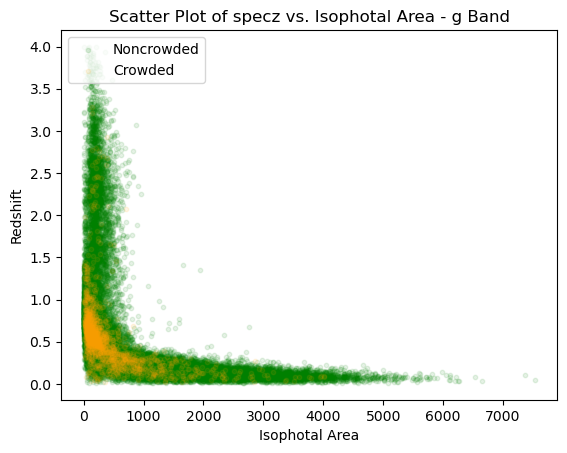

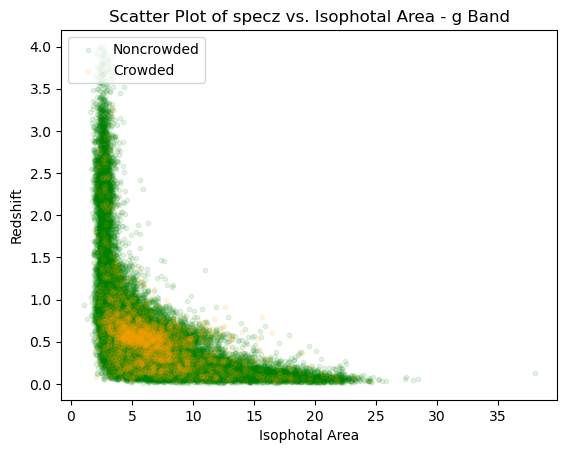

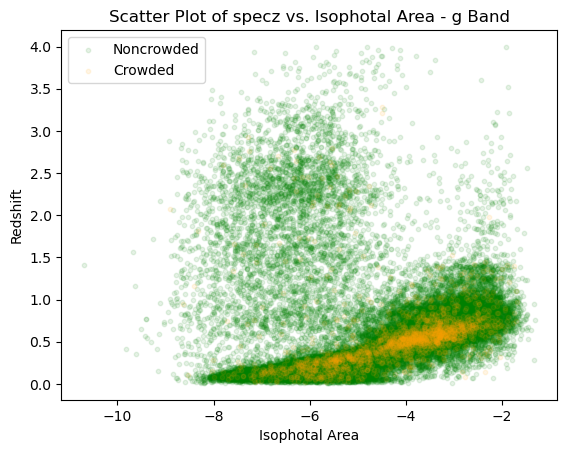

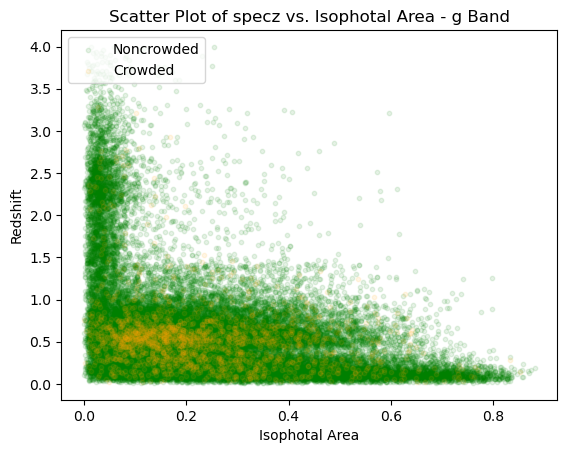

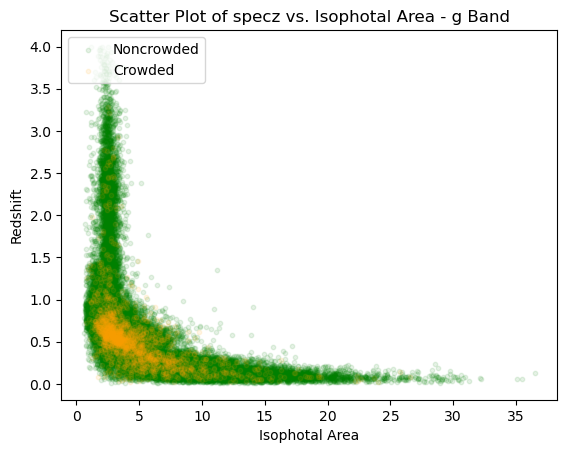

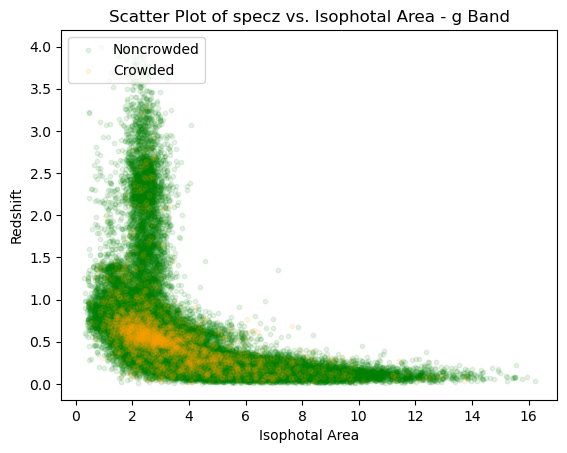

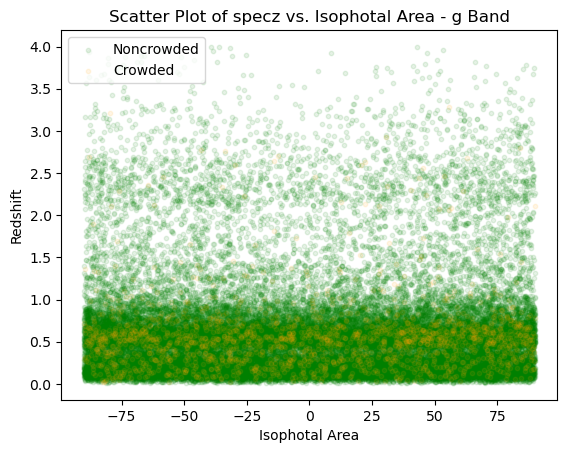

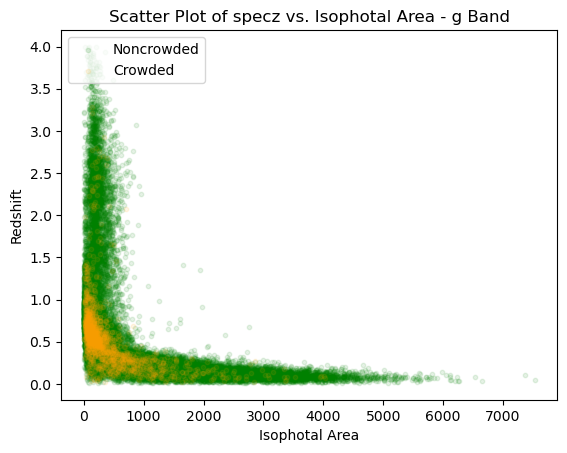

In [7]:
df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

colors = ['green', 'orange']
labels = ['Noncrowded', 'Crowded']

for shape_param in shape_params:
    fig, ax = plt.subplots()

    for i, subset_df in enumerate([noncrowded_df, crowded_df]):
        ax.scatter(subset_df[shape_param], subset_df['specz'], alpha=0.1, s=10, color=colors[i], label=labels[i])

    ax.legend(loc='upper left')
    ax.set_title(f'Scatter Plot of specz vs. {shape_param_names[i]} - g Band')
    ax.set_xlabel(shape_param_names[i])
    ax.set_ylabel('Redshift')

    plt.show()